In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# import data
city_data_df = pd.read_csv("data/city_data.csv")
ride_data_df = pd.read_csv("data/ride_data.csv")

In [3]:
# combine data into single dataset
merge_data_df = pd.merge(ride_data_df, city_data_df, on='city', how='left')
merge_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


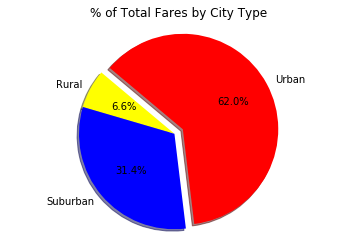

In [4]:
# Calculate total number of fares per city type
city_type_fare = merge_data_df.groupby('type')['fare'].sum()
city_type_fare_df = pd.DataFrame(city_type_fare)
city_type_fare_df

# Graph
labels = ['Rural', 'Suburban', 'Urban']
sizes = [4255.09, 20335.69, 40078.34]

colors = ['yellow', 'blue', 'red']
explode = [0, 0, 0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Total Fares by City Type')
plt.show()

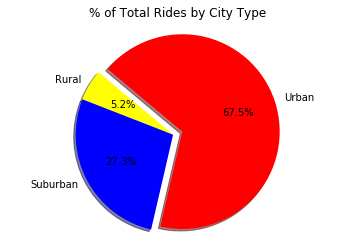

In [5]:
# Calculate total number of rides per city type
city_type_ride = merge_data_df.groupby('type')['ride_id'].count()
city_type_ride_df = pd.DataFrame(city_type_ride)
city_type_ride_df

# Graph
labels = ['Rural', 'Suburban', 'Urban']
sizes = [125, 657, 1625]

colors = ['yellow', 'blue', 'red']
explode = [0, 0, 0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Total Rides by City Type')
plt.show()

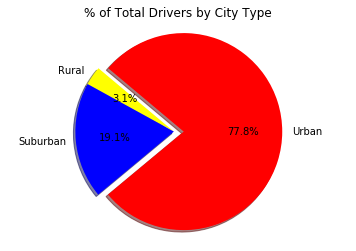

In [6]:
# Calculate total number of drivers per city type
city_type_driver = city_data_df.groupby('type')['driver_count'].sum()
city_type_driver_df = pd.DataFrame(city_type_driver)
city_type_driver_df

# Graph
labels = ['Rural', 'Suburban', 'Urban']
sizes = [104, 638, 2607]

colors = ['yellow', 'blue', 'red']
explode = [0, 0, 0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Total Drivers by City Type')
plt.show()

In [7]:
# Calculate Average fare per city
avg_fare_city = merge_data_df.groupby('city')['fare'].mean()
avg_fare_city_df = pd.DataFrame(avg_fare_city)
avg_fare_city_df.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [8]:
# Calculate Total rides per city
total_rides = merge_data_df.groupby('city')['fare'].count()
total_rides_df = pd.DataFrame(total_rides)
updated_total_rides_df = total_rides_df.rename(columns={'fare': 'total rides'})
updated_total_rides_df.head()

,total rides
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [9]:
# Calculate Total # of drivers by city
total_drivers = merge_data_df.groupby('city')['driver_count'].value_counts()
total_drivers_df = pd.DataFrame(total_drivers)
total_drivers_df1 = total_drivers_df.rename(columns={'driver_count': 'total rides'})
total_drivers_df1.reset_index().head()

,city,driver_count,total rides
0,Amandaburgh,12,18
1,Barajasview,26,22
2,Barronchester,11,16
3,Bethanyland,22,18
4,Bradshawfurt,7,10


In [10]:
# Calculate Rides per city per city type
rides_per_city_type = merge_data_df.groupby('type')['city'].value_counts()
rides_per_city_type_df = pd.DataFrame(rides_per_city_type)
rides_per_city_type_df1 = rides_per_city_type_df.rename(columns={'city': "# of rides"})
rides_per_city_type_df1.reset_index().head()

,type,city,# of rides
0,Rural,Michaelberg,12
1,Rural,Lake Latoyabury,11
2,Rural,Bradshawfurt,10
3,Rural,North Holly,9
4,Rural,West Heather,9


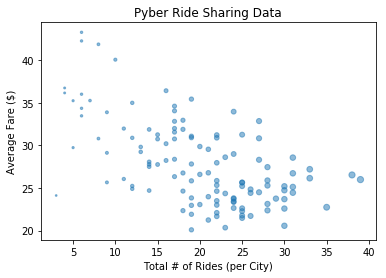

In [12]:
# GRAPH Total # of Rides vs Average Fare
x_values = total_rides
y_values = avg_fare_city

plt.scatter(x_values, y_values,
            marker='o',
            sizes=total_drivers, alpha = 0.50)
plt.xlabel('Total # of Rides (per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data')
plt.show()